<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Project Scenario:
I'm a Data Scientist with a housing agency in Boston, MA and have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on my experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following:

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, I'll generate statistics and visualizations that I think will be useful for the upper management to give them important insights given the questions they are asking. 

#### The following describes the dataset variables:

- **CRIM** - per capita crime rate by town

- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS** - proportion of non-retail business acres per town.

- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- **NOX** - nitric oxides concentration (parts per 10 million)

- **RM** - average number of rooms per dwelling

- **AGE** - proportion of owner-occupied units built prior to 1940

- **DIS** - weighted distances to five Boston employment centres

- **RAD** - index of accessibility to radial highways

- **TAX** - full-value property-tax rate per $10,000

- **PTRATIO** - pupil-teacher ratio by town

- **LSTAT** - % lower status of the population

- **MEDV** - Median value of owner-occupied homes in $1000's

In [45]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [46]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read in the dataset in the csv file from a URL


In [47]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [48]:
boston_df=pd.read_csv(boston_url)

In [49]:
# Initial review of data
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Initial Analysis with Visualizations

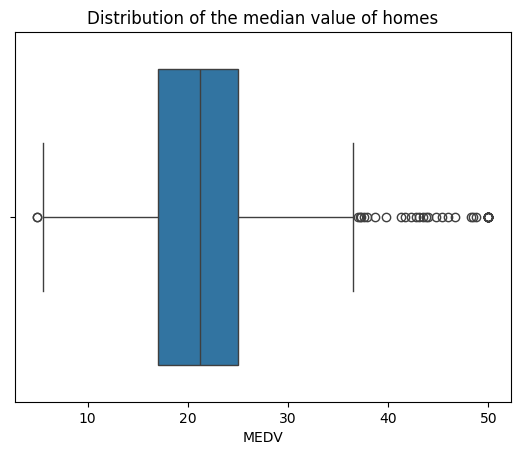

In [50]:
# Box plot for Median value of owner-occupied homes
ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title("Distribution of the median value of homes")
pyplot.show()

#### There appears to be many outliers on the upper end


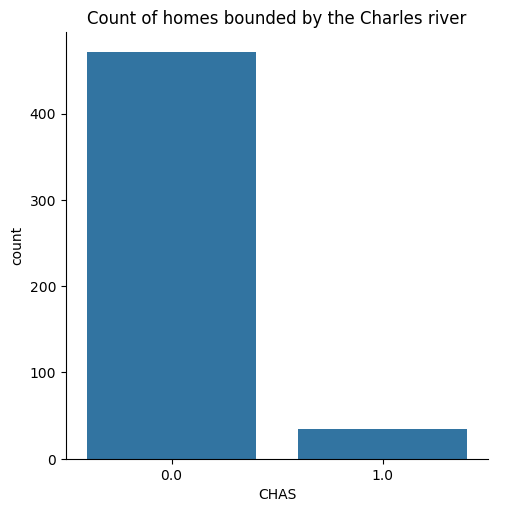

In [51]:
# Bar plot for the Charles river variable (1 if tract bounds Charles river, otherwise 0)
sns.catplot(x='CHAS', kind='count', data=boston_df)
pyplot.title("Count of homes bounded by the Charles river")
pyplot.show()

#### The majority of properties are not bounded by the Charles river as only around 5% of homes are

In [52]:
# The AGE variable is the proportion of owner-occupied units built prior to 1940
# I'll discretize the AGE variable into three groups of 35 and below, between 35 and 70, and 70 years and above so that it can be more easily compared with other variables
boston_df.loc[(boston_df['AGE'] <= 35), 'PROPORTION_OF_OLD_HOMES'] = '35 and below'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'PROPORTION_OF_OLD_HOMES'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'PROPORTION_OF_OLD_HOMES'] = '70 and above'

In [53]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,PROPORTION_OF_OLD_HOMES
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and above
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


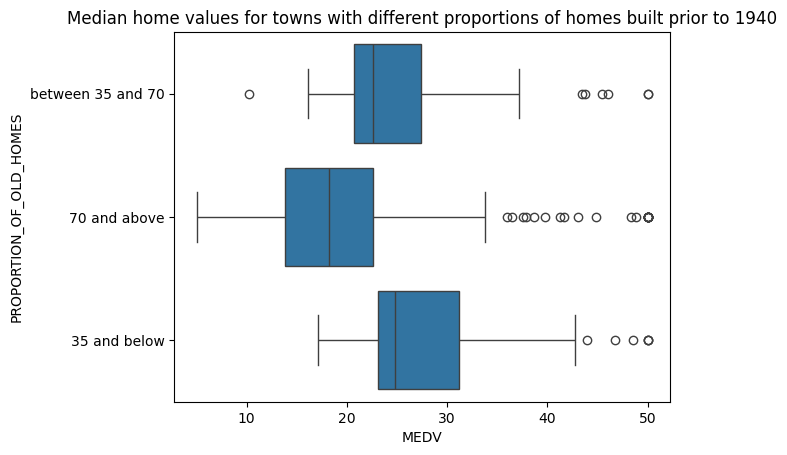

In [54]:
# Boxplot for MEDV vs AGE (discretized age)
ax = sns.boxplot(x='MEDV', y='PROPORTION_OF_OLD_HOMES', data=boston_df)
pyplot.title("Median home values for towns with different proportions of homes built prior to 1940")
pyplot.show()

#### It seems older homes are generally valued less (as median values are less when the proportion of older homes is higher in towns) but also have many more outliers on the upper end than newer homes

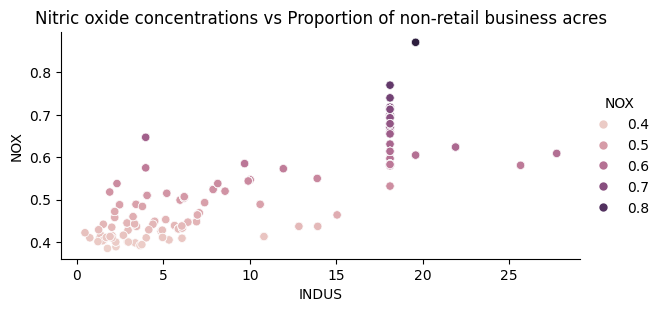

In [55]:
# Scatterplot to look at the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)
sns.relplot(x="INDUS", y="NOX", hue='NOX', data=boston_df, height = 3, aspect = 2)
pyplot.title("Nitric oxide concentrations vs Proportion of non-retail business acres")
pyplot.show()

#### Just looking at the scatterplot, it seems there's a possibility of a positive correlation between nitric oxides concentration (NOX) and the median value of owner-occupied homes (MEDV, in 1000's)

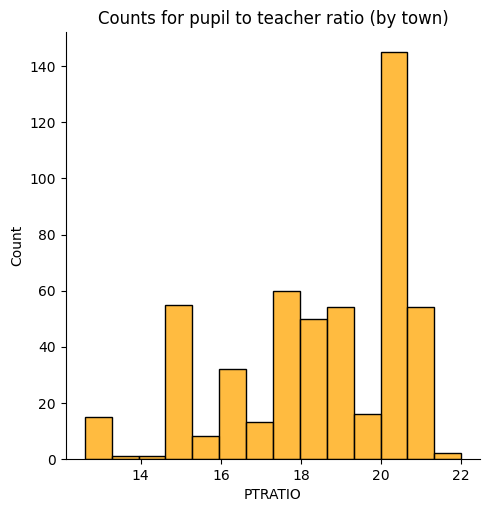

In [56]:
# Histogram for the pupil to teacher ratio by town
sns.displot(boston_df.PTRATIO, color="orange", kde=False)
pyplot.title("Counts for pupil to teacher ratio (by town)")
pyplot.show()

#### The pupil to teacher ratio is generally 15-21 with a large portion of towns seeming to have 20 pupils for each teacher

## Statistical Testing

Time to perform some statistical tests to solve some questions:
 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

I'll be using an **alpha (α) of 0.05** (95% confidence interval) for these tests.

### Test 1:

**Null Hypothesis**: The median value of houses bounded by the Charles river is the same as the median value of houses not bounded by the Charles river.

**Alternative Hypothesis**: There is a significant difference between the median value of houses bounded by the Charles river and those that are not.

In [57]:
# T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Result:** The p-value from the t-test was 0.000074 so we can reject the null hypothesis and say there is statistical significance to suggest that the median values of homes bounded and not bounded by the Charles river are different.

### Test 2:

**Null Hypothesis**: There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.

**Alternative Hypothesis**: There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [58]:
# Test for equality of variance first
scipy.stats.levene(boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == '35 and below']['MEDV'],
                   boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == '70 and above']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value of the Levene's test was greater than 0.05 we can assume equal variances between the three samples which means we can perform the ANOVA test.

In [59]:
# ANOVA test
thirty_five_and_below = boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == '35 and below']['MEDV']
thirty_five_to_fifty = boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == 'between 35 and 70']['MEDV']
seventy_and_above = boston_df[boston_df['PROPORTION_OF_OLD_HOMES'] == '70 and above']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_and_below, thirty_five_to_fifty, seventy_and_above)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Result:** As we have a very low p-value we can reject the null hypothesis and say there is statistical significance that suggests there is a difference in median house values based on the proportion of owner occupied units built prior to 1940.

### Test 3:

**Null Hypothesis**: The nitric oxide concentrations and proportion of non-retail business acres per town are independent of each other.

**Alternative Hypothesis**: The nitric oxide concentrations are associated with the proportion of non-retail business acres per town.

In [60]:
# Pearson correlation test
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Result:** Our p-value is very small so we can reject the null hypothesis and say there is statistical significance that suggests nitric oxide concentrations are associated with the proportion of non-retail business acres per town.

### Test 4:

**Null Hypothesis**: Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes.

**Alternative Hypothesis**: Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.

In [61]:
# X is the input variables (or independent variables)
X = boston_df['DIS']
# y is the target/dependent variable
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:35:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Result:** Our p-value is very small so we can reject the null hypothesis. Our coefficient for DIS (weighted distances to five Boston employment centres) is 1.0916 which means the median value of homes **increases** with more distance.